# Plotting task

### Importing necessary libraries and reading data

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline
# warnings.simplefilter('ignore')

In [35]:
PATH = os.path.join('..', 'data', 'production.csv')
df = pd.read_csv(PATH)
df.head()

,API,Year,Month,Liquid,Gas,RatioGasOil,Water,PercentWater,DaysOn,_LastUpdate
0,5005072170100,2014,11,9783,11470,1.172442,10558,1.079219,14,2016-04-06 17:20:05.757
1,5005072170100,2014,12,24206,26476,1.093778,5719,0.236264,31,2016-04-06 17:20:05.757
2,5005072170100,2015,1,20449,26381,1.290088,2196,0.107389,31,2016-04-06 17:20:05.757
3,5005072170100,2015,2,6820,10390,1.523460,583,0.085484,28,2016-04-06 17:20:05.757
4,5005072170100,2015,3,7349,7005,0.953191,122,0.016601,13,2016-06-16 14:07:33.203


In [36]:
APIs = df['API'].unique()
APIs = np.random.choice(APIs, 10)
APIs

array([35017246960000, 42371392130100, 33023010960000,  5123390440000,
        5123390440000, 42317401950000, 33025026780000, 33105035380000,
       33053061600000, 30015414470000], dtype=int64)

### Drawing plot

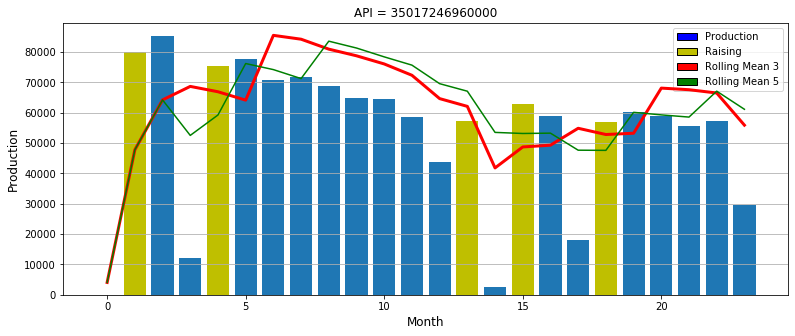

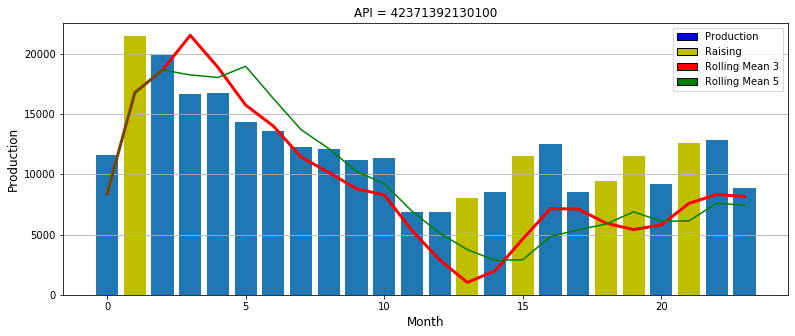

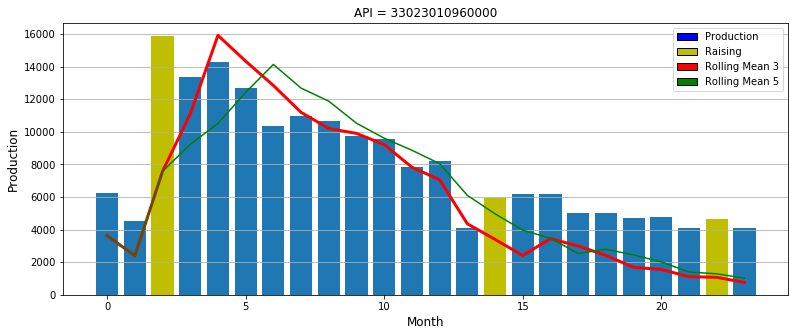

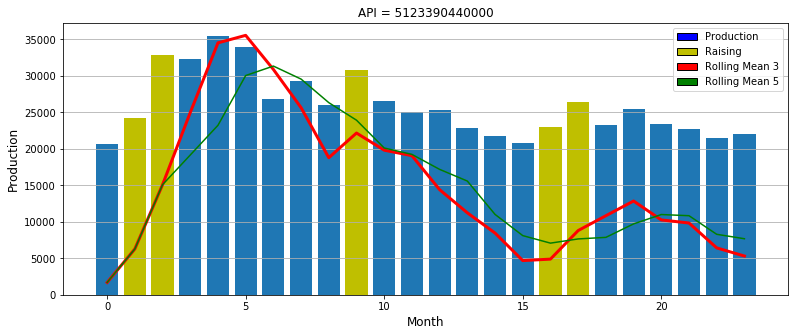

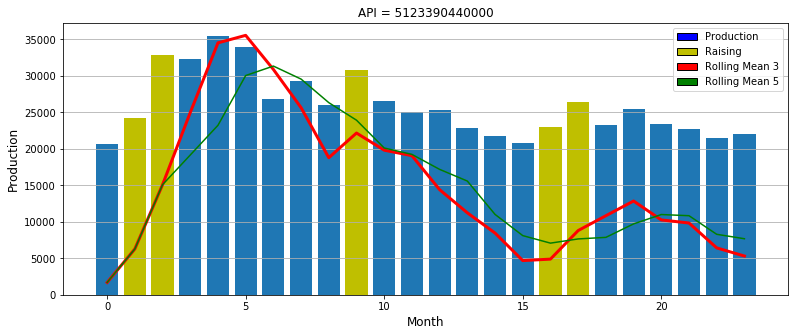

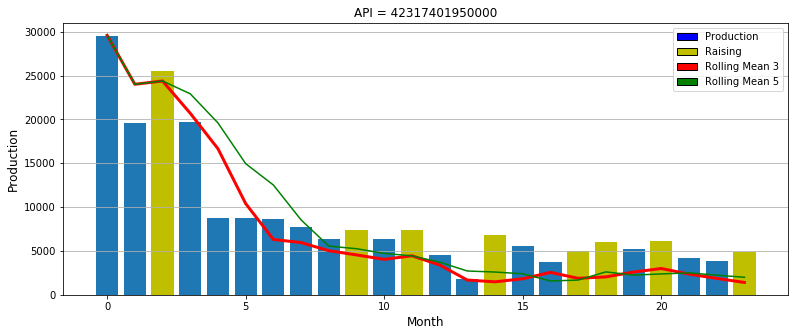

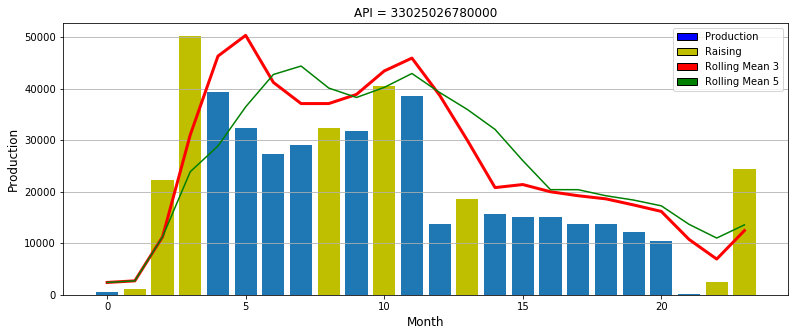

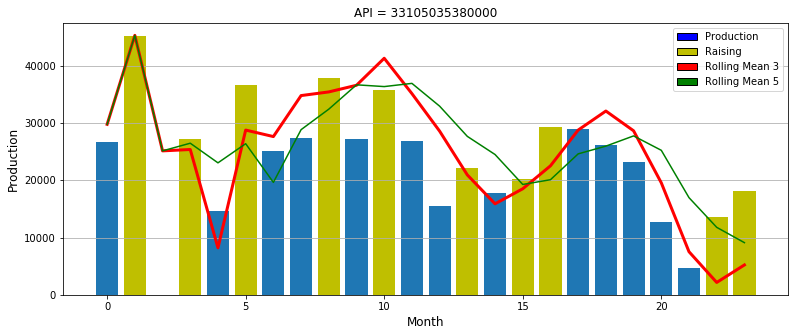

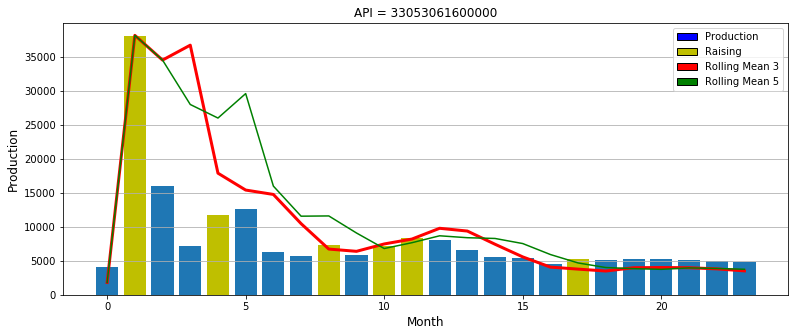

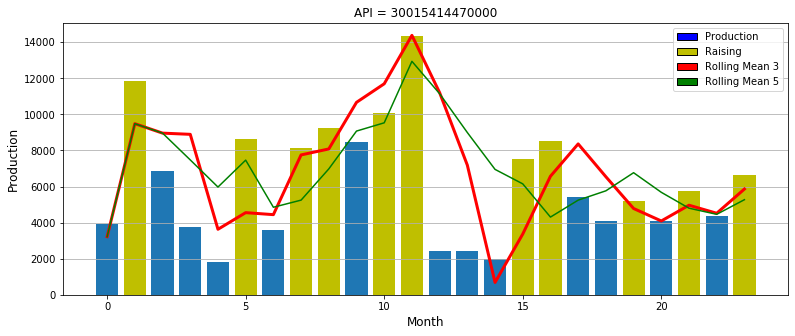

In [40]:
from matplotlib.patches import Rectangle

for i in range(10):
    plt.figure(figsize = (13, 5))
    data = df[df['API'] == APIs[i]]

    production_ = 'b'
    raising = 'y'         ## neccesary colors
    rolling_3 = 'r'
    rolling_5 = 'g'

    production = data['Liquid'] + data['Gas']
    x = np.array([int(i) for i in range(len(production))])

    ax = plt.bar(x, production, align = 'center') # A bar chart

    for j in range(1, len(ax)):
        if production.iloc[j - 1] * 1.1 < production.iloc[j]:   ## put raising color to those increased by more then 10%
            ax[j].set_fc(raising) 

    ## add the legend
    handles = [Rectangle((0,0), 1, 1, color = c, ec = "k") for c in [production_, raising, rolling_3, rolling_5]]
    labels= ["Production","Raising", "Rolling Mean 3", 'Rolling Mean 5']       
    
    plt.title(f'API = {APIs[i]}')
    plt.xlabel('Month', fontsize = 12)
    plt.ylabel('Production', fontsize = 12)
    plt.legend(handles, labels, prop = {'size': 10})
    plt.grid(axis = 'y')

    ## add rolling means with window = 3 and window = 5
    y = production.rolling(window = 3, min_periods = 1).mean()
    ax = plt.twinx()
    # ax.set_ylim(0, production.max())   ## creaing equal axes
    ax.plot(x, y, color = 'r', label = 'Rolling Mean 3', linewidth = 3)
    plt.gca().axison = False ## saving axis

    y = production.rolling(window = 5, min_periods = 1).mean()
    ax.plot(x, y, color = 'g', label = 'Rolling Mean 5')

    plt.show()

## Plots may overlap